In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [2]:
# Predict the age of abalone from physical measurements

In [3]:
# Load dataset
df = pd.read_csv("abalone.data.csv")

# Convert 'Rings' to 'Age'
df['Age'] = df['Rings'] + 1.5 

df.head()

,Sex,Length,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1.650
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,1.570
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1.710
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1.655
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,1.555


In [4]:
label_encoder = LabelEncoder()

# Encode 'Sex' column
df["Sex"]=label_encoder.fit_transform(df["Sex"])


# show the first 5 rows
df.head()

,Sex,Length,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1.650
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,1.570
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1.710
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1.655
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,1.555


In [5]:
df["Sex"].unique()

array([2, 0, 1])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int32  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), int32(1)
memory usage: 277.5 KB


In [7]:
df.shape

(4177, 9)

In [8]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Viscera weight    0
Shell weight      0
Rings             0
Age               0
dtype: int64

In [9]:
df.duplicated().sum()

0

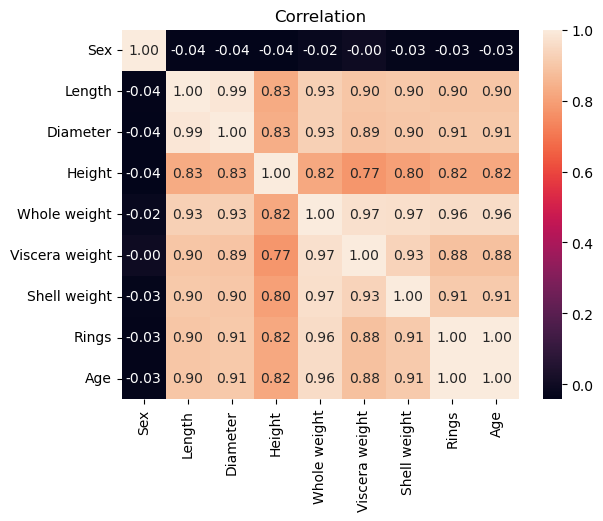

In [10]:
sns.heatmap(df.corr(), annot=True,fmt='.2f')
plt.title("Correlation")
plt.show()

In [11]:
target_corr=df.corr()["Age"].abs().sort_values(ascending=False) # (abs)absolute value, descending order
target_corr

Age               1.000000
Rings             1.000000
Whole weight      0.955355
Shell weight      0.907656
Diameter          0.905330
Length            0.897706
Viscera weight    0.882617
Height            0.817338
Sex               0.034854
Name: Age, dtype: float64

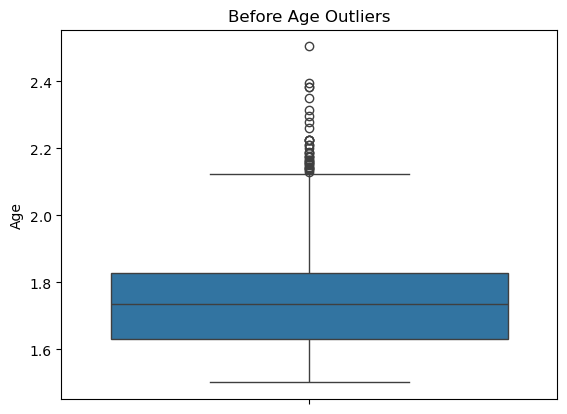

In [12]:
sns.boxplot(y=df["Age"])
plt.title("Before Age Outliers")
plt.show()

In [13]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,1.738831
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,0.139203
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.501500
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,1.630000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,1.734000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,1.829000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,2.505000


In [14]:
Q1 = 1.63  # 25th percentile from provided data
Q3 = 1.82  # 75th percentile from provided data
IQR = Q3 - Q1  

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR  # Lower limit
upper_bound = Q3 + 1.5 * IQR  # Upper limit

# Apply Capping & Flooring method
df["Age"] = np.where(df["Age"] < lower_bound, lower_bound, df["Age"])
df["Age"] = np.where(df["Age"] > upper_bound, upper_bound, df["Age"])

# Show updated statistics
print(df["Age"].describe())

count    4177.000000
mean        1.737821
std         0.135854
min         1.501500
25%         1.630000
50%         1.734000
75%         1.829000
max         2.105000
Name: Age, dtype: float64


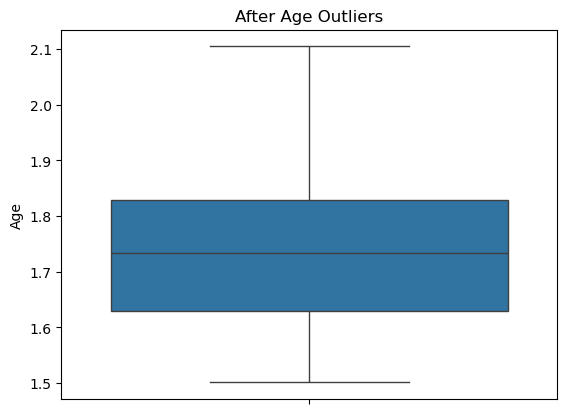

In [15]:
sns.boxplot(y=df["Age"])
plt.title("After Age Outliers")
plt.show()

In [16]:
X=df.drop(columns=["Age"])  # Drop target column
y=df["Age"]  # Target variable

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical columns for scaling
outlier_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

# Standardize numerical features
scaler = StandardScaler()
X_train[outlier_columns] = scaler.fit_transform(X_train[outlier_columns])
X_test[outlier_columns] = scaler.transform(X_test[outlier_columns])

print("X_train and X_test successfully scaled!")

X_train and X_test successfully scaled!


In [17]:
print("X_train shape:",X_train.shape) # samples used for training, each with features.
print("y_train shape:", y_train.shape)

X_train shape: (3341, 8)
y_train shape: (3341,)


In [18]:
print("X_test shape:",X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (836, 8)
y_test shape: (836,)


In [19]:
# Build deep learning model with improved architecture
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),  # Helps reduce overfitting
    Dense(128, activation='relu'), # 1 Hidden Layers
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'), # 2 Hidden Layers  
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'), # Output layer 
    Dense(1)  
])

# Compile the model with a lower learning rate
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='mse', metrics=['mae'])

# Apply Early Stopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=10, batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)

# Predict on test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred.flatten())
r2 = r2_score(y_test, y_pred.flatten())

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

C:\Users\sathi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.7194 - mae: 0.5359 - val_loss: 0.1841 - val_mae: 0.4172
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0493 - mae: 0.1651 - val_loss: 0.0435 - val_mae: 0.1858
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0386 - mae: 0.1510 - val_loss: 0.0255 - val_mae: 0.1230
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0253 - mae: 0.1227 - val_loss: 0.0219 - val_mae: 0.1397
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0190 - mae: 0.1055 - val_loss: 0.0068 - val_mae: 0.0675
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0133 - mae: 0.0900 - val_loss: 0.0068 - val_mae: 0.0557
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0103 - mae: 0.0792 - val_loss: 0.0052 - val_mae: 0.0526
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0083 - mae: 0.0706 - val_loss: 0.0013 - val_mae: 0.0293
Epoch 9/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - l

In [20]:
# Evaluate model
test_loss, test_mae=model.evaluate(X_test, y_test)  # X_test: Input data for the test set
print("Test MAE:", test_mae)  # Lower is better     # y_test: Actual age values for the test set

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013 - mae: 0.0282    
Test MAE: 0.029269946739077568


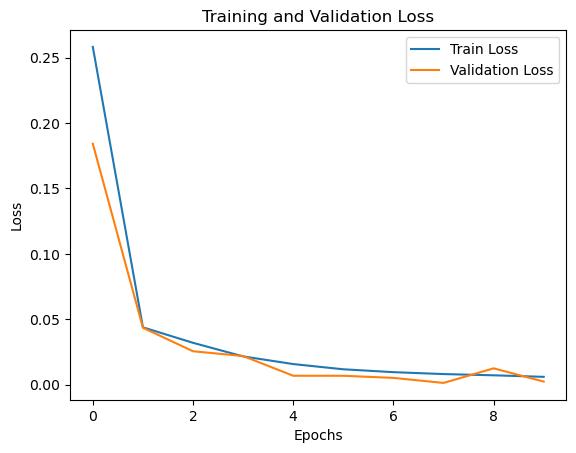

In [21]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

   Actual  Predicted
0   1.825   1.839059
1   1.745   1.792154
2   1.835   1.877172
3   1.880   1.873859
4   1.715   1.692985


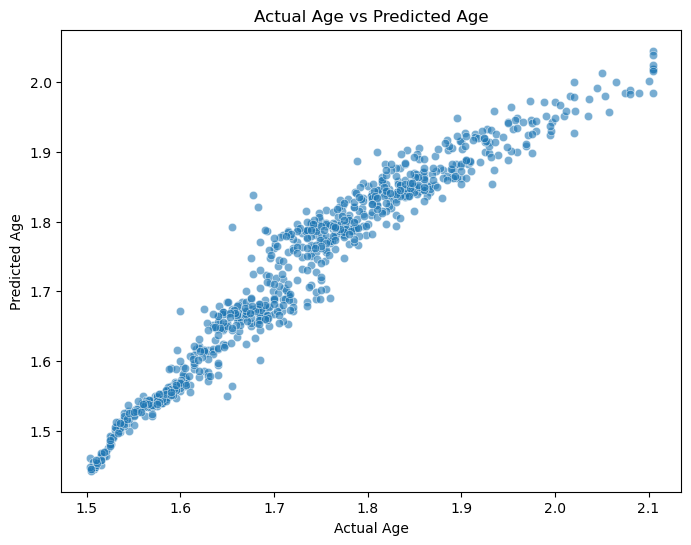

In [22]:
# Display actual values vs predicted values
results = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred.flatten()})
print(results.head())

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred.flatten(), alpha=0.6)
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Actual Age vs Predicted Age")
plt.show()